## <center>Exploratory data analysis | EDA </center>

### 1. Loading the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time 
import re
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### 2. Loading the dataset

In [11]:
data= pd.read_excel('Pune Real Estate Data.xlsx')
print(data.shape)
data.head()

(200, 18)


,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


### 3. Copy the dataset into the new dataframe

In [12]:
df = data.copy()

In [13]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


### 4. Data Preprocessing

#### 1. Extracting Location details

In [72]:
# Extracting [City State Country] separately from the location column

df['City'] = df['Location'].apply(lambda x: x.split(',')[0].lower().strip())
df['State'] = df['Location'].apply(lambda x: x.split(',')[1].lower().strip())
df['Country'] = df['Location'].apply(lambda x: x.split(',')[2].lower().strip())

df.head(3)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0


#### 2. Property Type

In [16]:
df['Propert Type'].value_counts()

2bhk           56
3BHK           28
3bhk           19
2BHK           18
2 bhk          16
3 bhk          10
1BHK            9
1bhk            7
1 BHK           3
2bhk            3
2 bhk           2
3.5 bhk         2
3.5bhk          2
2.5 bhk         2
4 bhk           2
2.5 BHK         2
3 BHK           2
5BHK            2
2 BHK           1
3bhk            1
4.5bhk          1
1bhk            1
5 bhk           1
3+2bhk          1
2+2 bhk         1
3 BHK Grand     1
3 BHK           1
4BHK            1
6BHK            1
shop            1
1 bhk           1
3  bhk          1
4bhk            1
Name: Propert Type, dtype: int64

#### Note: Basically we here will convert the number+string into only number and group them 

In [19]:
# Regex to match the numbers and create a separate column

numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 

df['Property Type Cleaned'] = df['Propert Type'].apply(lambda x: numbers.findall(x)[0] 
                                                       if len(numbers.findall(x)) > 0 else 0)

In [20]:
df['Property Type Cleaned'].value_counts()

2      97
3      64
1      21
4       4
2.5     4
3.5     4
5       3
6       1
0       1
4.5     1
Name: Property Type Cleaned, dtype: int64

#### 3. Sub-Area

In [22]:
df['Sub-Area'].value_counts()

Kharadi                     16
handewadi                   11
BT Kawade RD                10
Hinjewadi                    9
Ravet                        9
wadgaon sheri                9
hadapsar                     8
NIBM                         8
BANER                        7
pisoli                       6
kiwale                       6
vimannagar                   6
Akurdi                       6
Susgaon                      6
bavdhan budruk               6
bavdhan                      6
Karvanagar                   5
manjri                       5
Mahalunge                    5
Mundhwa                      5
dhanori                      4
Bavdhan                      4
mahalunge                    4
Balewadi                     4
tathawade                    4
KirkatWadi Sinhagad Road     3
baner                        3
Keshav Nagar                 3
ravet                        3
Undri                        2
mohammadwadi                 2
Koregaon Park                2
Baner   

In [23]:
# Number of categories before cleaning

len(df['Sub-Area'].value_counts())

39

In [24]:
df['Sub-Area Cleaned'] = df['Sub-Area'].apply(lambda x: x.lower().strip())

In [25]:
# Number of categories after cleaning
len(df['Sub-Area Cleaned'].value_counts())

34

#### 4. Company Name

In [27]:
df['Company Name'].value_counts()

Mantra Properties                29
kundan Spaces                    14
unique properties                11
Shapoorji Paloonji               10
jhala group                      10
Vijaya Laxmi Creations            9
Puraniks                          8
ravima ventures                   7
Lush Life                         6
vijaya Laxmi infrarealtors        6
VTP Reality                       6
Porwal & Anand Develkoper         6
nirman developers                 6
Oxy Buildcorp                     6
Kalpataru                         5
kohinoor group                    5
maha anand Pinnac associates      5
Urban Space Creator               5
SUPREME                           4
keystone landmark                 4
Wellwisher Apartments             3
Dolphin Group                     3
Bhaktamar Realities               3
proviso group                     3
venkatesh bhoomi construction     2
majestique landmarks              2
Calyx Spaces                      2
ANP CORP                    

In [28]:
# Number of categories before cleaning

len(df['Company Name'].value_counts())

37

In [29]:
df['Company Name Cleaned'] = df['Company Name'].apply(lambda x: x.lower().strip())

In [30]:
len(df['Company Name Cleaned'].value_counts())

37

#### 5. TownShip Name/ Society Name

In [31]:
# Number of categories before cleaning


len(df['TownShip Name/ Society Name'].value_counts())

54

In [54]:
df['TownShip Name/ Society Name Cleaned'] = df['TownShip Name/ Society Name'].apply(lambda x: x.lower().strip())

In [55]:
len(df['TownShip Name/ Society Name Cleaned'].value_counts())

54

#### 6. Description

In [56]:
df['Description Cleaned'] = df['Description'].apply(lambda x: x.lower().strip())

In [59]:
df.head(5)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1


#### 7. Encoding Binary Features:

In [36]:
df['ClubHouse Cleaned'] = (df['ClubHouse'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))

In [46]:
df['School / University in Township Cleaned'] = (df['School / University in Township ']
                                                    .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))


In [45]:
df['Hospital in TownShip Cleaned'] = (df['Hospital in TownShip']
                                                .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))


In [44]:
df['Mall in TownShip Cleaned'] = (df['Mall in TownShip']
                                                    .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))


In [43]:
df['Park / Jogging track Cleaned'] = (df['Park / Jogging track']
                                       .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))


In [41]:
df['Swimming Pool Cleaned'] = (df['Swimming Pool']
                                                 .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))


In [42]:
df['Gym Cleaned'] = (df['Gym']
                             .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))

In [47]:
df.tail()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes,SUPREME ESTIA - the name itself emanates a fee...,pune,maharashtra,india,3,baner,supreme,supreme estia,supreme estia - the name itself emanates a fee...,1,0,0,0,1,1,1
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes,Not every day would you come across a developm...,pune,maharashtra,india,4,baner,supreme,supreme estia,not every day would you come across a developm...,1,0,0,0,1,1,1
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes,A lifestyle of abundance that fourishes amidst...,pune,maharashtra,india,2,baner,tejraaj group,tej elevia,a lifestyle of abundance that fourishes amidst...,0,0,0,0,1,1,1
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes,"We are proud of it.We are sure, you will fall ...",pune,maharashtra,india,3,baner,tejraaj group,tej elevia,"we are proud of it.we are sure, you will fall ...",0,0,0,0,1,1,1
199,200,"Pune, Maharashtra, India",BANER,2bhk,776,90.68,9.068,VTP Reality,vtp solitaire,NaN,yes,no,no,no,yes,yes,yes,"A beautiful collection of ultra-modern homes, ...",pune,maharashtra,india,2,baner,vtp reality,vtp solitaire,"a beautiful collection of ultra-modern homes, ...",1,0,0,0,1,1,1


#### 8. Fixing Numerical Features:

In [73]:
def avg_property_area(x):
    
    # Find out all the number's from the sq.ft feature 
    x = numbers.findall(x)
    
    # If it's a proper number then return the same number in float type
    if len(x) == 1:
        return np.float(x[0])
    
    # If the length is 2 then take the average of it
    elif len(x) == 2:
        return (np.float(x[0])+np.float(x[1]))/2
    
    # Else return a negative value
    else:
        return -99

    
# Find out all the numbers in sqrt.feet area
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")  

In [74]:
df['Property Area in Sq. Ft. Cleaned'] = df['Property Area in Sq. Ft.'].apply(lambda x: avg_property_area(str(x)))

In [76]:
df[['Property Area in Sq. Ft.','Property Area in Sq. Ft. Cleaned']].sample(5)

,Property Area in Sq. Ft.,Property Area in Sq. Ft. Cleaned
180,900,900.0
12,2220,2220.0
147,844,844.0
117,1074,1074.0
0,492,492.0


In [77]:
df.head(10)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0
5,6,"Pune, Maharashtra, India",Mahalunge,3BHK,975,95,9.5,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Strategically located in Mahalunge, Pune's qua...",pune,maharashtra,india,3,mahalunge,godrej properties,godrej hills retreat,"strategically located in mahalunge, pune's qua...",1,1,1,1,1,1,1,975.0
6,7,"Pune, Maharashtra, India",Balewadi,2BHK,877 to 912,75,7.5,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes,The Project Boasts 6 Elegant Towers Of 11 & 12...,pune,maharashtra,india,2,balewadi,anp corp,anp universe,the project boasts 6 elegant towers of 11 & 12...,1,0,0,0,1,1,1,894.5
7,8,"Pune, Maharashtra, India",Balewadi,3BHK,1077 to 1272,100,10.0,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes,The Project Boasts 6 Elegant Towers Of 11 & 12...,pune,maharashtra,india,3,balewadi,anp corp,anp universe,the project boasts 6 elegant towers of 11 & 12...,1,0,0,0,1,1,1,1174.5
8,9,"Pune, Maharashtra, India",Ravet,2BHK,905,65,6.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,Urban space creator Project has 2 &3 BHK flats...,pune,maharashtra,india,2,ravet,urban space creator,urban skyline,urban space creator project has 2 &3 bhk flats...,1,0,0,0,1,1,1,905.0
9,10,"Pune, Maharashtra, India",Ravet,3BHK,1125,88,8.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,"One of the top residential hubs in Pune, It is...",pune,maharashtra,india,3,ravet,urban space creator,urban skyline,"one of the top residential hubs in pune, it is...",1,0,0,0,1,1,1,1125.0


In [82]:
# Extract the number's
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 



# Apply the function on the prices in lakh features
df['Price in lakhs Cleaned'] = (df['Price in lakhs'].apply(lambda x: np.float(numbers.findall(str(x))[0]) 
                                                           if len(numbers.findall(str(x)))>0 else np.nan ))

In [79]:
df[['Price in lakhs','Price in lakhs Cleaned']].sample(5)

,Price in lakhs,Price in lakhs Cleaned
153,66,66.00
185,39.49,39.49
7,100,100.00
109,43.49,43.49
41,Null,NaN


In [80]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sr. No.                                  200 non-null    int64  
 1   Location                                 200 non-null    object 
 2   Sub-Area                                 200 non-null    object 
 3   Propert Type                             200 non-null    object 
 4   Property Area in Sq. Ft.                 200 non-null    object 
 5   Price in lakhs                           200 non-null    object 
 6   Price in Millions                        199 non-null    float64
 7   Company Name                             200 non-null    object 
 8   TownShip Name/ Society Name              200 non-null    object 
 9   Total TownShip Area in Acres             51 non-null     float64
 10  ClubHouse                                200 non-n

### 5. Univariate Analysis

#### 1. Extract only the required feature's from the data frame 

In [89]:
features = df.columns.tolist()[18:]

print("Total Number of Features: "+str(len(features)))

Total Number of Features: 17


In [90]:
df1 = df[features]
print(df1.shape)
df1.head(3)

(200, 17)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0


#### 2. Distribution of Location and Sub-Area

#### a. Location

,City,Company Name Cleaned
0,pune,200


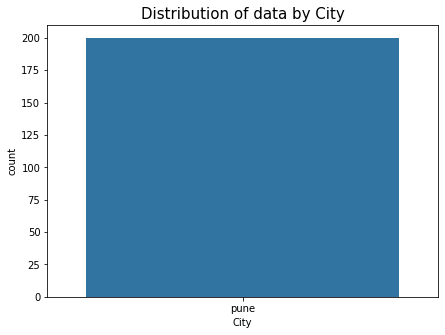

In [91]:
# Location
display(df1.groupby('City')['Company Name Cleaned'].count().reset_index())
plt.figure(figsize=(7,5))
sns.countplot(df1['City'])
plt.title("Distribution of data by City",size=15)
plt.show()

#### b. Sub-area

Unique Number of Sub-Area in the Data: 34


,Sub-Area Cleaned,City
13,kharadi,16
2,baner,12
27,ravet,12
8,handewadi,11
3,bavdhan,10
5,bt kawade rd,10
33,wadgaon sheri,9
9,hinjewadi,9
20,mahalunge,9
7,hadapsar,8


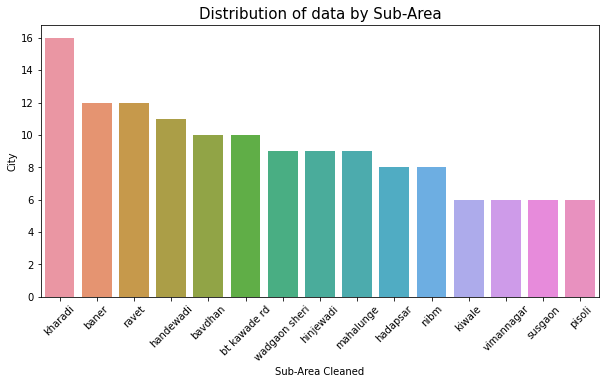

In [93]:
# Sub-Area
print(f"Unique Number of Sub-Area in the Data: {df1['Sub-Area Cleaned'].nunique()}")

temp = df1.groupby('Sub-Area Cleaned')['City'].count().reset_index().sort_values(by='City',ascending=False)[:15]
display(temp)

plt.figure(figsize=(10,5))
sns.barplot(x=temp['Sub-Area Cleaned'],y=temp['City'])
plt.title("Distribution of data by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

#### c. Distribution of company and township

Unique Number of Company in the Data: 37


,Company Name Cleaned,City
0,mantra properties,29
1,kundan spaces,14
2,unique properties,11
3,shapoorji paloonji,10
4,jhala group,10
5,vijaya laxmi creations,9
6,puraniks,8
7,ravima ventures,7
8,lush life,6
9,vijaya laxmi infrarealtors,6


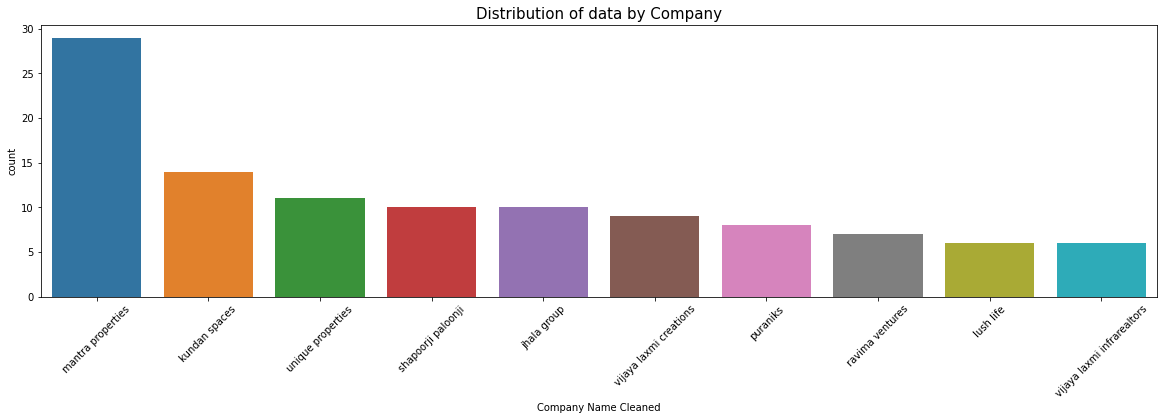

In [95]:
# Company
print(f"Unique Number of Company in the Data: {df1['Company Name Cleaned'].nunique()}")

display(df1.groupby('Company Name Cleaned')['City'].count().sort_values(ascending=False).reset_index()[:10])


plt.figure(figsize=(20,5))
sns.countplot(df1['Company Name Cleaned'],
              order=df1.groupby('Company Name Cleaned')['City'].count().sort_values(ascending=False).index[:10])
plt.title("Distribution of data by Company",size=15)
plt.xticks(rotation=45)
plt.show()

#### d. Township

Unique Number of Township/Society in the Data: 54


,TownShip Name/ Society Name Cleaned,City
0,mantra 29 gold,13
1,eternia 2.0,8
2,newton homes,6
3,oxy beaumonde,6
4,parklane urbanjoy,6
5,presidia,6
6,satyam serenity,6
7,k ville,6
8,satyam shery,6
9,abitante fiore,6


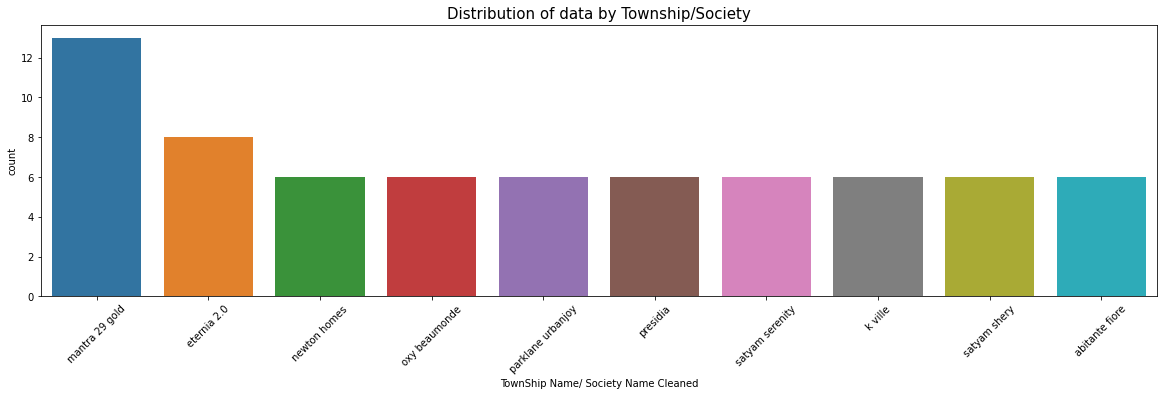

In [96]:
# Township
print(f"Unique Number of Township/Society in the Data: {df1['TownShip Name/ Society Name Cleaned'].nunique()}")

display(df1.groupby('TownShip Name/ Society Name Cleaned')['City'].count().sort_values(ascending=False)
          .reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(df1['TownShip Name/ Society Name Cleaned'],
              order=df1.groupby('TownShip Name/ Society Name Cleaned')['City'].count()
                      .sort_values(ascending=False).index[:10])
plt.title("Distribution of data by Township/Society",size=15)
plt.xticks(rotation=45)
plt.show()

#### e. Distribution of Property Area and Price

Summary Statistics of Property Area:


,Property Area in Sq. Ft. Cleaned
count,200.000000
mean,894.060000
std,380.256831
min,113.000000
25%,670.000000
50%,800.500000
75%,1041.250000
max,2447.000000


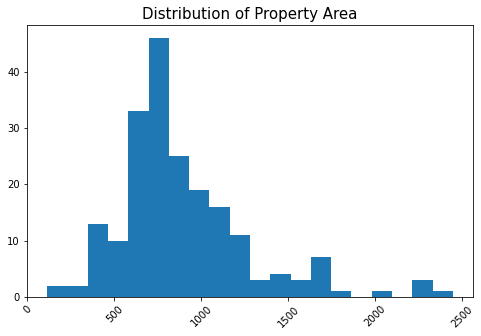

In [97]:
print("Summary Statistics of Property Area:")
display(df1[['Property Area in Sq. Ft. Cleaned']].describe())

plt.figure(figsize=(8,5))
plt.hist(df1['Property Area in Sq. Ft. Cleaned'],bins=20)
plt.title("Distribution of Property Area",size=15)
plt.xticks(rotation=45)
plt.show()

#### f. Price distribution

Summary Statistics of Price:


,Price in lakhs Cleaned
count,199.000000
mean,95.258291
std,101.869843
min,13.190000
25%,51.500000
50%,70.000000
75%,99.435000
max,930.000000


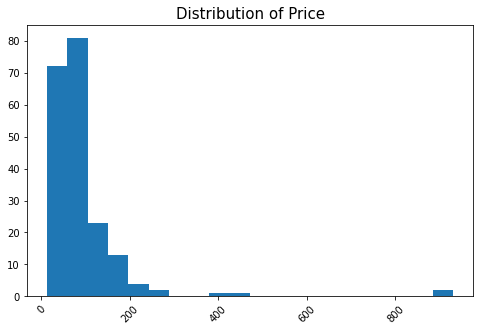

In [98]:
print("Summary Statistics of Price:")
display(df1[['Price in lakhs Cleaned']].describe())

plt.figure(figsize=(8,5))
plt.hist(df1['Price in lakhs Cleaned'],bins=20)
plt.title("Distribution of Price",size=15)
plt.xticks(rotation=45)
plt.show()

In [100]:
df1.head()

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


### 6. Multivariate Analysis

#### a. Property area vs price

,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
count,200.000000,199.000000
mean,894.060000,95.258291
std,380.256831,101.869843
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435000
max,2447.000000,930.000000


Property Area in Sq. Ft. Cleaned    0.493096
Price in lakhs Cleaned              1.000000
Name: Price in lakhs Cleaned, dtype: float64


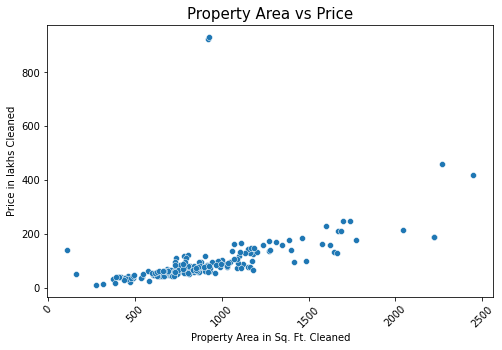

In [103]:
# Property Area vs Price
temp = df1[['Property Area in Sq. Ft. Cleaned','Price in lakhs Cleaned']]

display(temp.describe())

corr_matrix = temp.corr()
print(corr_matrix['Price in lakhs Cleaned'])

plt.figure(figsize=(8,5))
sns.scatterplot(temp['Property Area in Sq. Ft. Cleaned'],temp['Price in lakhs Cleaned'])
plt.title("Property Area vs Price",size=15)
plt.xticks(rotation=45)
plt.show()

#### b. How each amenities correlates with the price?

In [104]:
df1.head(2)

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0


In [105]:
# Extract the required number of feature's

feats_to_plot = df1.columns.tolist()[8:15]
print(len(feats_to_plot))

7


#### c. Plot the violin plot

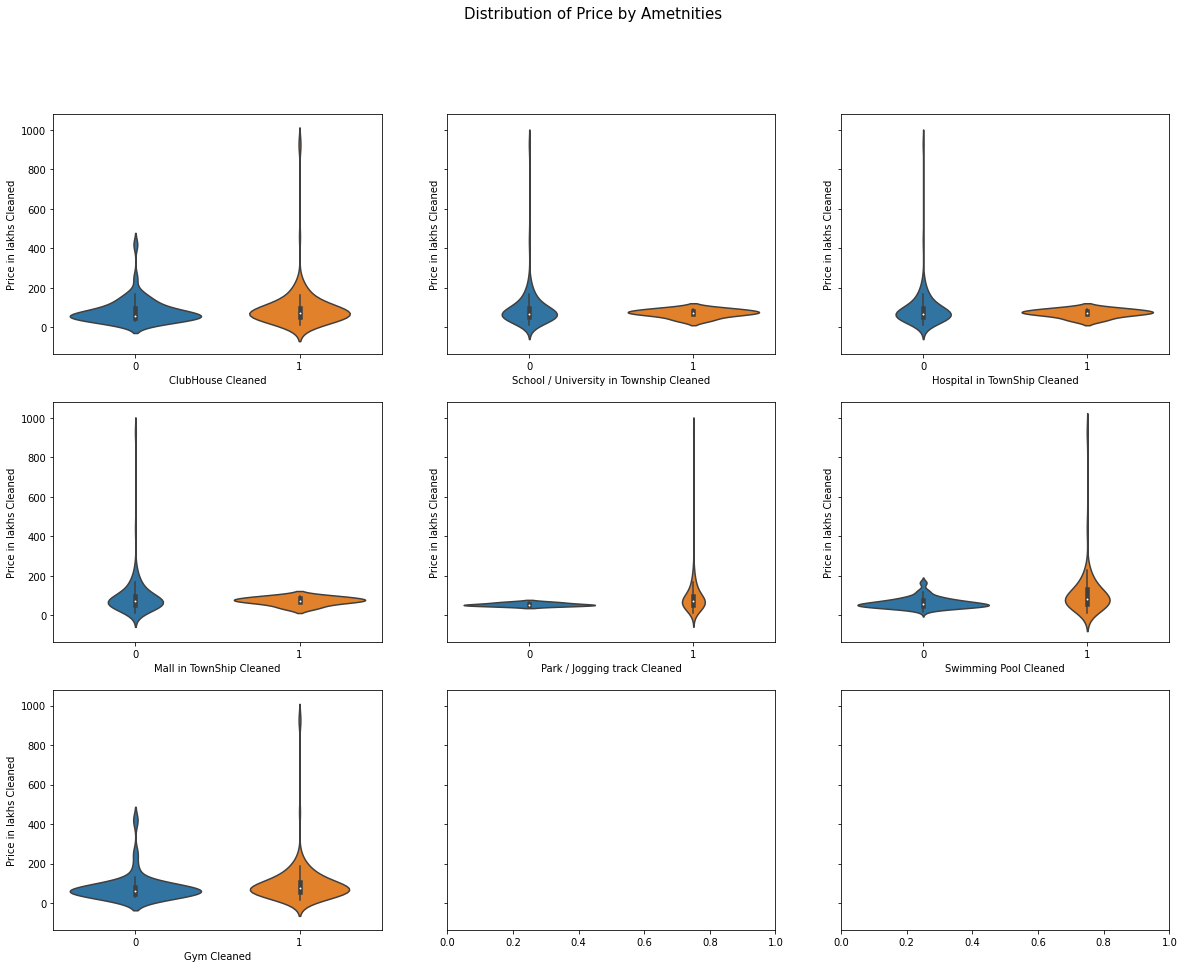

In [106]:
# Plot the violin plot

fig,ax = plt.subplots(nrows=3,ncols=3,sharey=True,figsize=(20,15))
plt.suptitle("Distribution of Price by Ametnities",size=15)
for i,col in enumerate(feats_to_plot):
    sns.violinplot(x = df1[col],y=df1['Price in lakhs Cleaned'],ax=ax[i//3,i%3])

#### d. What are the 3 main amenities that the top 10% priced properties have 

In [107]:
# Filter for top 10% priced properties 
df1[['Price in lakhs Cleaned']].describe()

,Price in lakhs Cleaned
count,199.000000
mean,95.258291
std,101.869843
min,13.190000
25%,51.500000
50%,70.000000
75%,99.435000
max,930.000000


#### e. Selecting threshold as 80 lakh's

,Amenities,Popularity
4,Park / Jogging track Cleaned,81
6,Gym Cleaned,71
5,Swimming Pool Cleaned,66
0,ClubHouse Cleaned,62
1,School / University in Township Cleaned,2
2,Hospital in TownShip Cleaned,2
3,Mall in TownShip Cleaned,2


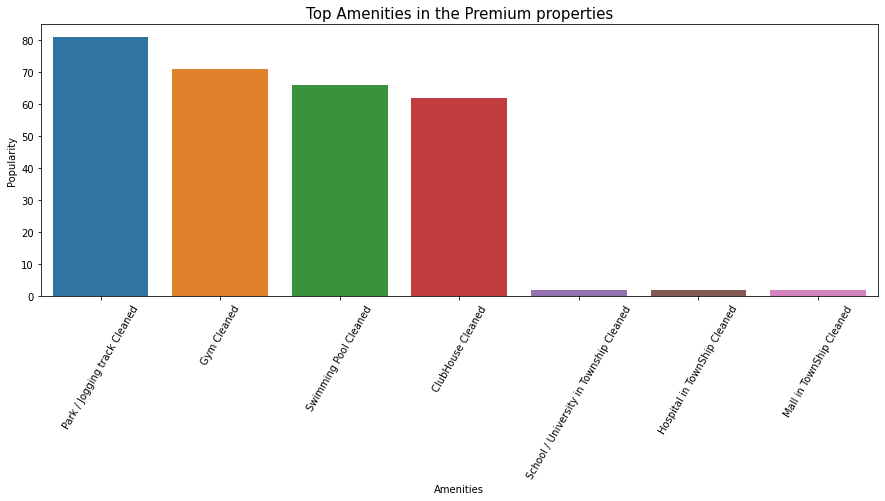

In [108]:
# selecting threshold as 80 Lakhs
amenities_cols = df1.columns.tolist()[8:15]

temp = df1[df1['Price in lakhs Cleaned']>=80][amenities_cols].sum().reset_index()
temp.rename(columns={'index':'Amenities',0:'Popularity'},inplace=True)
temp = temp.sort_values(by='Popularity',ascending=False)
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities'],y=temp['Popularity'])
plt.title("Top Amenities in the Premium properties",size=15)
plt.xticks(rotation=60)
plt.show()

### 7. Treating nulls and saving the data 

#### a. Print the first 5 values

In [110]:
df1.head(5)

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


#### b. Check for null values 

In [111]:
df1.isna().sum()

City                                       0
State                                      0
Country                                    0
Property Type Cleaned                      0
Sub-Area Cleaned                           0
Company Name Cleaned                       0
TownShip Name/ Society Name Cleaned        0
Description Cleaned                        0
ClubHouse Cleaned                          0
School / University in Township Cleaned    0
Hospital in TownShip Cleaned               0
Mall in TownShip Cleaned                   0
Park / Jogging track Cleaned               0
Swimming Pool Cleaned                      0
Gym Cleaned                                0
Property Area in Sq. Ft. Cleaned           0
Price in lakhs Cleaned                     1
dtype: int64

#### c. Drop the null values

In [112]:
df_final = df1.dropna()
df_final.isna().sum()

City                                       0
State                                      0
Country                                    0
Property Type Cleaned                      0
Sub-Area Cleaned                           0
Company Name Cleaned                       0
TownShip Name/ Society Name Cleaned        0
Description Cleaned                        0
ClubHouse Cleaned                          0
School / University in Township Cleaned    0
Hospital in TownShip Cleaned               0
Mall in TownShip Cleaned                   0
Park / Jogging track Cleaned               0
Swimming Pool Cleaned                      0
Gym Cleaned                                0
Property Area in Sq. Ft. Cleaned           0
Price in lakhs Cleaned                     0
dtype: int64

### 8. Saving the cleaned data model

In [114]:
# Saving the final dataframe with selected features as a csv file

df_final.to_csv('real_estate_selected.csv',index=False)